In [90]:

# Fixed, self-contained cells for Simple Linear Regression

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import pickle

warnings.filterwarnings("ignore")


In [91]:
# Load dataset (keep your original path)
dataset = pd.read_csv(r"C:\Users\sonik\Desktop\python lerning\ML\1) Regression\1) Simple Linear Regression\Practical Codes\Salary_Data.csv")


In [92]:
# Features / target
X = dataset[['YearsExperience']]   # ensure X is a 2D frame
y = dataset['Salary']


In [93]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [94]:
# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


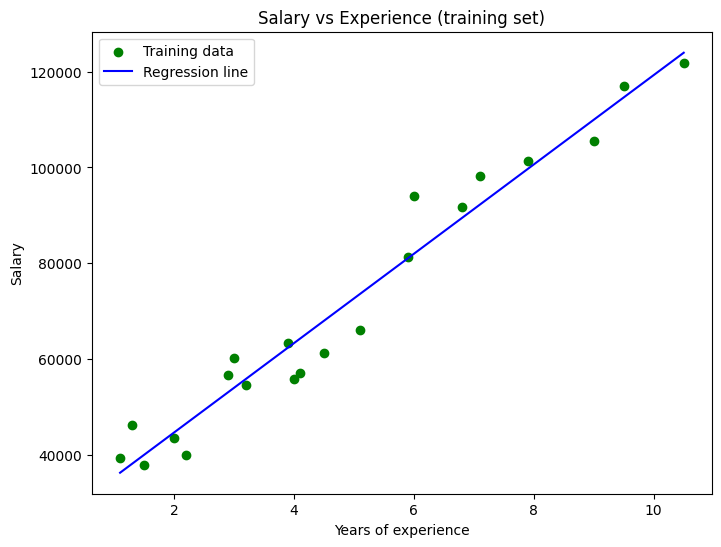

In [95]:
# Plot training set with regression line
plt.figure(figsize=(8,6))
plt.scatter(X_train['YearsExperience'], y_train, color='g', label='Training data')

x_line = np.linspace(X_train['YearsExperience'].min(), X_train['YearsExperience'].max(), 100).reshape(-1,1)
plt.plot(x_line.ravel(), regressor.predict(x_line), color='b', label='Regression line')

plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [96]:
# Prepare test data and predictions
X_test_values = X_test['YearsExperience'].values.reshape(-1,1)
y_pred = regressor.predict(X_test_values)


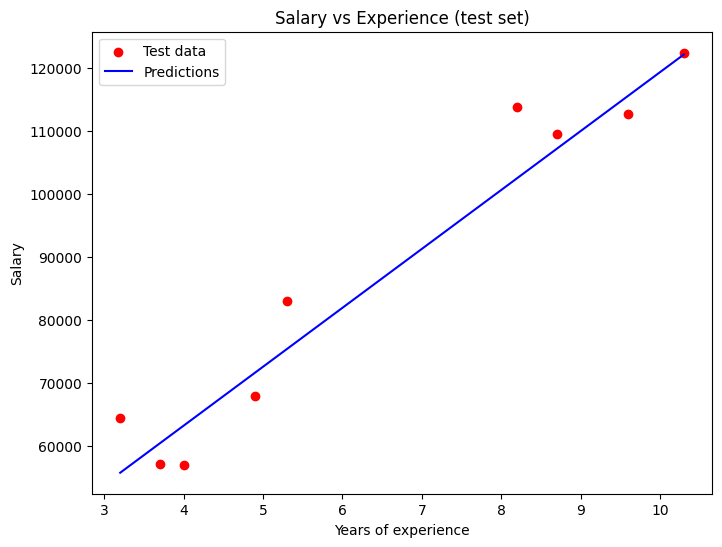

In [97]:
# Plot test set with predicted values
plt.figure(figsize=(8,6))
plt.scatter(X_test['YearsExperience'], y_test, color='red', label='Test data')

# For a clean line over test points, sort by X
sorted_idx = np.argsort(X_test_values.ravel())
plt.plot(X_test_values.ravel()[sorted_idx], y_pred[sorted_idx], color='b', label='Predictions')

plt.title('Salary vs Experience (test set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [98]:
# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 score (test): {r2:.4f}")
print(f"Mean Absolute Error (test): {mae:.2f}")


R2 score (test): 0.9414
Mean Absolute Error (test): 5161.33


In [99]:
p = np.array([[15]])

In [100]:
y_predict = regressor.predict(p)
y_predict

array([166004.66419212])

In [101]:
model_path = r"C:\Users\sonik\Desktop\Coding Cloud\Machine Learning\simple_linear_regression_model.pkl"
with open(model_path, "wb") as f:
    pickle.dump(regressor, f)
print(f"Model saved to: {model_path}")

Model saved to: C:\Users\sonik\Desktop\Coding Cloud\Machine Learning\simple_linear_regression_model.pkl
